In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
!ip install fitz
!pip install pymupdf
!pip install path

Object "install" is unknown, try "ip help".
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
!pip install gaft

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
import pandas as pd
import numpy as np
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from gaft import GAEngine
from gaft.components import BinaryIndividual, Population
from gaft.operators import RouletteWheelSelection, UniformCrossover, FlipBitMutation

In [171]:
path="/content/drive/MyDrive/AI/eval.xlsx"
df=pd.read_excel(path)

In [172]:
print(df.head())

                                                text  HS
0  Hurray, saving us $$$ in so many ways @potus @...   1
1  Why would young fighting age men be the vast m...   1
2  @KamalaHarris Illegals Dump their Kids at the ...   1
3  NY Times: 'Nearly All White' States Pose 'an A...   0
4  Orban in Brussels: European leaders are ignori...   0


In [173]:
import nltk
from nltk.corpus import stopwords
nltk.download('words')
nltk.download("popular")
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

True

In [174]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string 
stopword= set(stopwords.words("english"))

In [175]:
import fitz
import pandas as pd
from path import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from collections import OrderedDict

In [176]:
def clean (text):

    text = str(text).lower()

    text = re.sub('\[.*?\]', '', text)

    text = re.sub('https?://\S+\www\.\S+', '', text)

    text = re.sub('<.*?>+','', text)

    text = re.sub('[%s]' % re.escape(string.punctuation),'' , text)
  
    text = re.sub('\n', '', text)

    text = re.sub('\w\d\w*', '', text)

    text=[word for word in text.split(' ') if word not in stopword]

    text=" ".join(text)

    text = [stemmer.stem (word) for word in text.split(' ')]

    text=" ".join(text)

    return text

df["text"] = df["text"].apply(clean) 
print(df.head())

                                                text  HS
0  hurray save us  mani way potus realdonaldtrump...   1
1  would young fight age men vast major one escap...   1
2  kamalaharri illeg dump kid border like road ki...   1
3  ny time near white state pose array problem im...   0
4  orban brussel european leader ignor peopl want...   0


In [177]:
X = df['text']
y = df['HS']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [178]:
train_size = int(0.7 * X_vec.shape[0])
X_train = X_vec[:train_size]
y_train = y[:train_size]
X_test = X_vec[train_size:]
y_test = y[train_size:]


In [179]:
indv_template = BinaryIndividual(ranges=[(0, 1)] * X_train.shape[1])
population = Population(indv_template=indv_template, size=150)
population.init()

selection = RouletteWheelSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

engine = GAEngine(population=population,selection = RouletteWheelSelection(),crossover =UniformCrossover(pc=0.8, pe=0.5),mutation =FlipBitMutation(pm=0.1))



In [180]:
# Define the fitness function
@engine.fitness_register
def fitness_function(indv):
    weights = np.array(indv.solution)
    clf = DecisionTreeClassifier(random_state=0, max_depth=10, max_features=None)
    clf.fit(X_train.multiply(weights), y_train)
    y_pred = clf.predict(X_train.multiply(weights))
    a= -accuracy_score(y_train, y_pred).tolist()
    return a

In [181]:
# Run the GA engine
engine.run(ng=10)

In [182]:
# Get the best individual
best_indv = engine.population.best_indv(engine.fitness)

In [183]:

# Evaluate the model
weights = np.array(best_indv.solution)
clf = DecisionTreeClassifier(random_state=0, max_depth=10, max_features=None)
clf.fit(X_train.multiply(weights), y_train)
y_pred = clf.predict(X_test.multiply(weights))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6237037037037036
Confusion Matrix:
 [[1506  945]
 [  71  178]]


In [184]:
import matplotlib.pyplot as plt

In [185]:
! pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [186]:
import scikitplot as skplt

<Axes: title={'center': 'Confusion Matrix for GA'}, xlabel='Predicted label', ylabel='True label'>

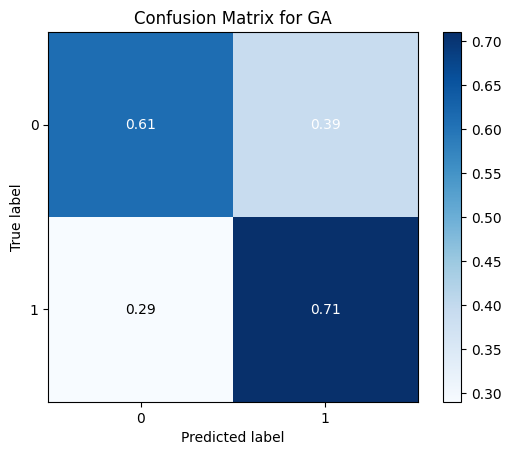

In [187]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix for GA')

<Axes: title={'center': 'Hate Speech Classification Curve'}, xlabel='Training examples', ylabel='Score'>

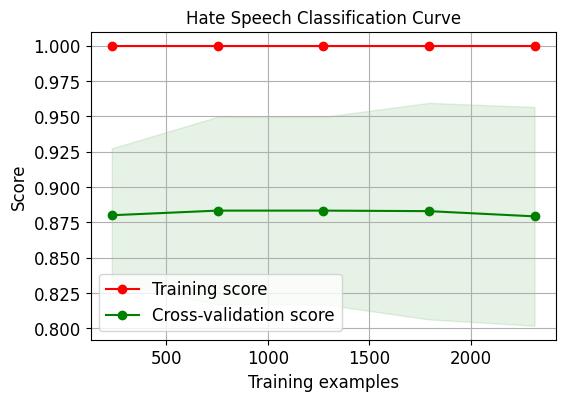

In [188]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Hate Speech Classification Curve")

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

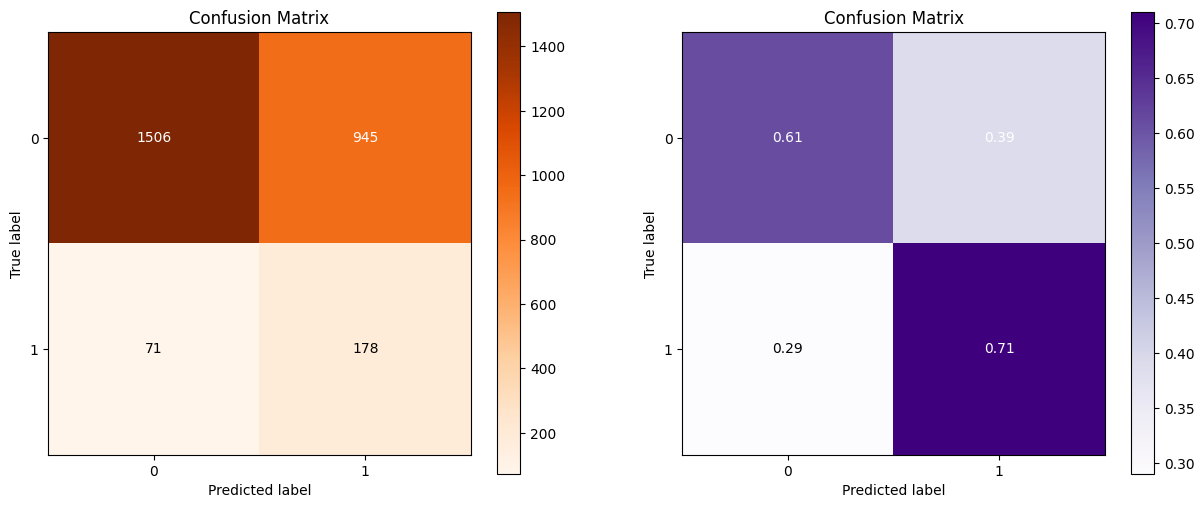

In [189]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2)